<a href="https://colab.research.google.com/github/yongtaoliu/dual-GP/blob/main/Dual_GP_PL_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The PL data in this notebook is from HybriD3 https://materials.hybrid3.duke.edu/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import cv2

In [ ]:
!gdown https://drive.google.com/uc?id=1Rt5uBUmXKJwJI09guk3TsQ0xSp68tHpa

Downloading...
From: https://drive.google.com/uc?id=1Rt5uBUmXKJwJI09guk3TsQ0xSp68tHpa
To: /content/datasum.zip
100% 18.2k/18.2k [00:00<00:00, 25.0MB/s]


In [ ]:
!unzip -j datasum.zip

Archive:  datasum.zip
  inflating: data1.npz               
  inflating: data10.npz              
  inflating: data2.npz               
  inflating: data3.npz               
  inflating: data4.npz               
  inflating: data5.npz               
  inflating: data6.npz               
  inflating: data7.npz               
  inflating: data8.npz               
  inflating: data9.npz               
  inflating: datainfo.txt            


In [ ]:
with open('datainfo.txt', 'r') as f:
  datainfo = f.read()
  print(datainfo)

data 1: Methylammonium lead chloride
data 2: N-methylethane-1,2-diammonium lead bromide
data 3: N-(3-aminopropyl)imidazole lead bromide
data 4: Bis(phenylethylammonium) lead bromide
data 5: Bis(butylammonium) lead bromide
data 6: Bis((R)-1-(1-naphthyl)ethylamineH) N, N-dimethylformamide lead chloride
data 7: 3-aminopyrrolidinium lead bromide
data 8: 2-methyl-1,5-diaminopentane lead bromide
data 9: N-methylpropane-1,3-diammonium lead bromide
data 10: Bis(phenylmethylammonium) lead chloride


In [ ]:
# Define a function to extract peak position
def peak_height(spec_x, spec_y):
  peaks, properties = find_peaks(spec_y, height=0.3, width = 10)
  pk_height = properties['peak_heights']
  pk_pos = spec_x[peaks[pk_height.argmax()]]
  return pk_height.max(), pk_pos

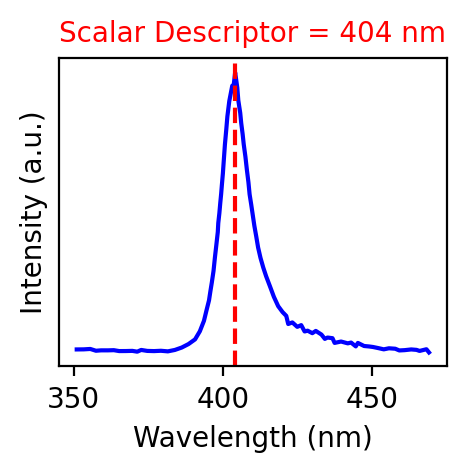

404.10800079345705


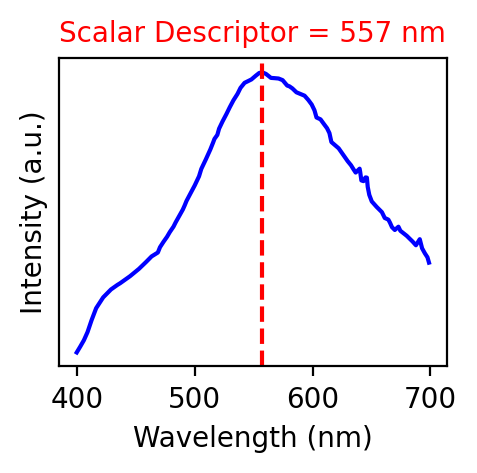

557.4059138870239


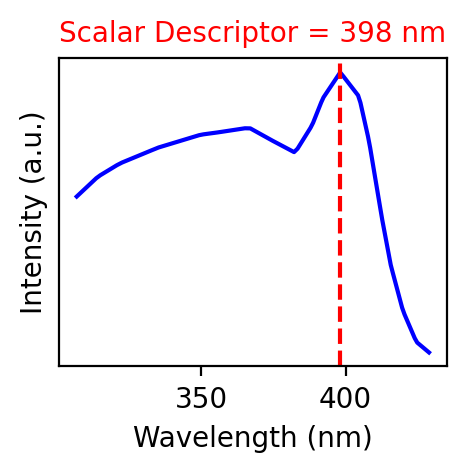

398.10768430614473


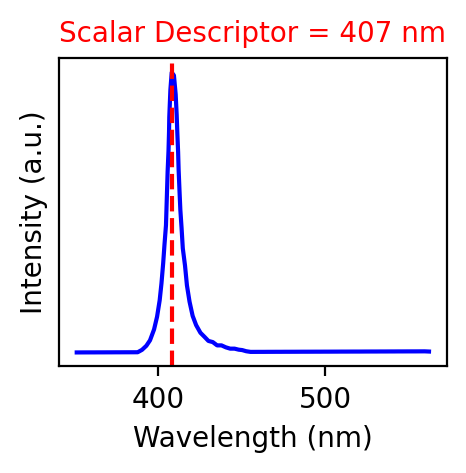

407.978159614563


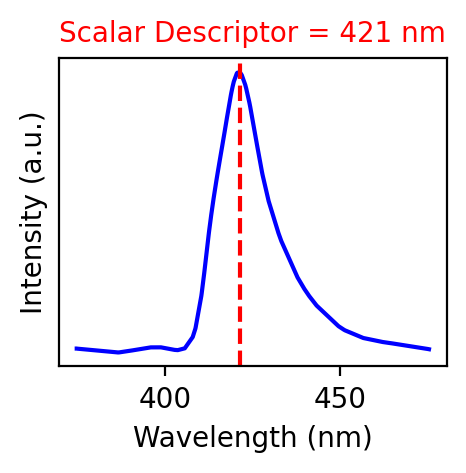

421.296


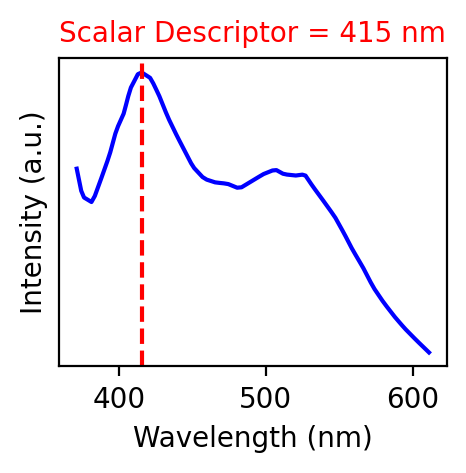

415.5337176513672


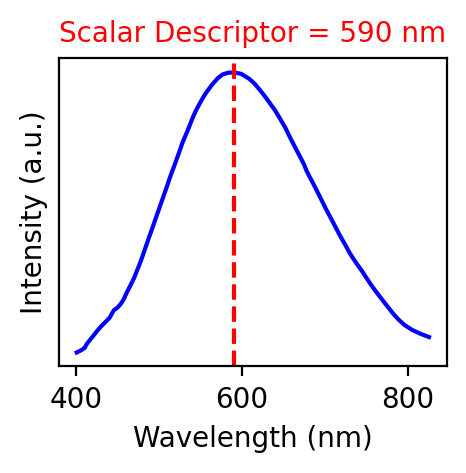

590.8452823697492


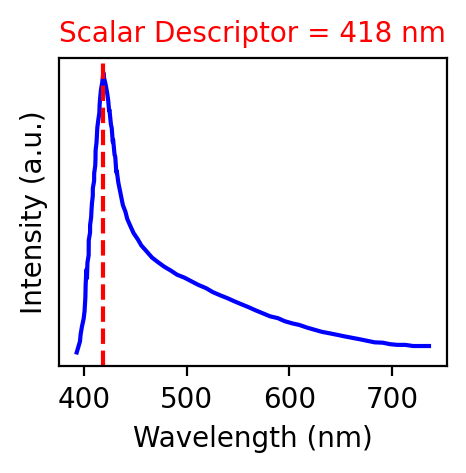

418.60784957885744


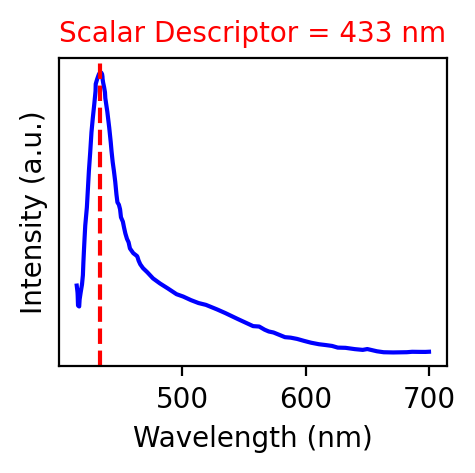

433.6068400936127


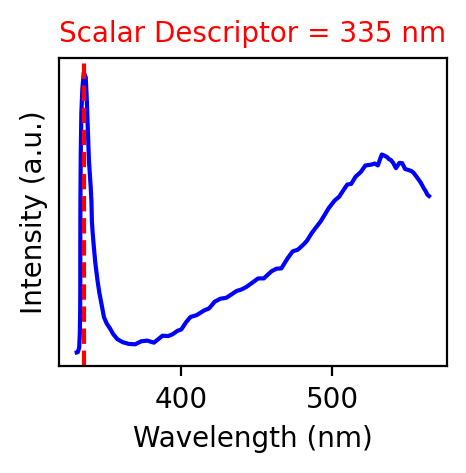

335.5860747976303


In [ ]:
for i in range (1, 11):
  pl_emission = np.load('data' + str(i) + '.npz')
  pl_int = pl_emission['intensity']
  pl_wav = pl_emission['wavelength']
  pk_height, pk_pos = peak_height(pl_wav, pl_int)
  plt.figure(figsize=(2.5, 2.0), dpi = 200)
  plt.xlabel('Wavelength (nm)')
  plt.ylabel('Intensity (a.u.)')
  plt.yticks([])
  plt.plot(pl_wav, pl_int, c= 'b')
  plt.axvline(x=pk_pos, linestyle = "--", color='r', label = 'Emission Wavelength')
  # plt.legend()
  plt.title("Scalar Descriptor = {} nm".format(int(pk_pos)), fontsize = 10, c = 'r')
  plt.show()
  print(pk_pos)